# Brute force fibonacci
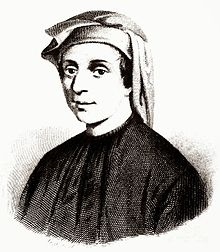
La secuencia de fibonacci viene definida por la expresión:
$$ F(n) = F(n-1) + F(n-2) $$
where
$$ F(0) = F(1)  = 1 $$

### Utiliza una aproximación recursiva...

In [ ]:

def simple_fb(n):
    global iters
    iters += 1
    if n <2: 
        return 1
    else:
        return simple_fb(n-1) + simple_fb(n-2)

In [ ]:
# lets try it
import math
for i in range(3,40):
    iters = 0 
    print (f"The Fibonacci {i}th number is {simple_fb(i)} {iters=} coef {math.log2(iters)/i}")
    
# you will have to break it at 34 or so... ( We saw it to have an exponential complexity)

#### Hasta donde puedes llegar ??

### Memoization
Memoization should help, now.. by storing and not recomputing valuies....

In [ ]:
# lets keep a table at hand, with a silly dictionary...
def memoized_fb(n,memo=None):
    # create memo table if not provided
    if memo is None:  memo = {}
        
    # check for solution in the memo table
    val = memo.get(n)
    
    # if not found, compute
    if val is None: 
        if n <2: 
            val = 1
        else:
            val = memoized_fb(n-1,memo) + memoized_fb(n-2,memo)
            
        memo[n] = val
        
    return val

memoized_fb(100)

In [ ]:

# lets tryreturn 1

for i in range(0,1001,100):
    print (f"The Fibonacci {i}th number is {memoized_fb(i)}")

### a bottom up approach makes it simple... with memoization just as needed...

In [ ]:
def bottomUp_fb(n):
    if n < 2:
        return 1
    fb_2 = 1
    fb_1 = 1
    m = 2
    while m <= n:
        fib = fb_1 + fb_2
        fb_2 = fb_1
        fb_1 = fib
        m += 1
    return fib

bottomUp_fb(10)      

This memoized, PD, bottom up approach works better

In [ ]:
for i in range(0,10001,1000):
    print (f"The Fibonacci {i}th number is {bottomUp_fb(i)}")    

In [ ]:
fib10000 = str(bottomUp_fb(10000))
print(f"Fibonnaci de 10000 tiene {len(fib10000)} dígitos")
print(f"Fibonnaci de 10000 tiene {sum( c == '0' for c in fib10000)} Zeros")

In [ ]:
%timeit simple_fb(30)
%timeit memoized_fb(1000)
%timeit bottomUp_fb(1000)



---- 
# Cambio de Moneda

Ver fichero coinex

___
#  Line Bowling

## Description 
you can choose to :  
* pass  up kickgin V = 0 
* kick the first pin     v = v_1
* kick the first and second pin v = v_1 * V_2

The objective is tto maximize yield of the ping squence ( v_0, v_1, .... v_n-1)

subproblems B[i] = optimal de B[i:] for i en 0,1,2,... n-1  
Recursion B(i) = Max(   
                    >>0 + B(i+1), # do nothing  
                    >>v_i + B(i+1)  # hit first  
                    >>v_i*v_i+1 + B(I+2) # hit first two  
                    >>)  

base case B(n-1) = max( 0, v_n-1)

In [ ]:
# implementation

def B(vec, memo = None):
    
    if memo is None: memo = {} 
    
    # check for memoization
    val = memo.get(len(vec))
    
    if val is None:        
        match len(vec):
            case 0:
                val = 0 
            case 1:
                val = ( max(0, vec[0]))
            case other:
                B_1 = B(vec[1:],memo)
                B_2 = B(vec[2:],memo)
                op1 =                 B_1        # do not hit
                op2 = vec[0]        + B_1        # hit single
                op3 = vec[0]*vec[1] + B_2        # double hit
                val = max(op1, op2, op3)         # take the best option
                
        memo[len(vec)] = val                     # memoize it...
        
    return val

lets try it up

In [ ]:
import random
v = [ random.randint(-10,10)  for _ in range(25)]
print (v)
B(v)

##  Bowling  bottom up version ?

In [ ]:
def bottomUp_B(vec):
    val_ = 0 
    val = max(0, vec[-1])
    
    i = len(vec)-2
    while i >= 0 :
        op1 = 0               + val
        op2 = vec[i]          + val
        op3 = vec[i]*vec[i+1] + val_    

        val_ = val
        val = max(op1, op2, op3)
        i -= 1     
        
        
    return val

In [ ]:
import random
# v = [ random.randint(-10,10)  for _ in range(20)]
print (v)
print ( bottomUp_B(v))


Lets time it up

In [ ]:
import copy
v1 = [ random.randint(-10,10)  for _ in range(1000)]
v2 = copy.copy(v1)
%timeit B(v1)
%timeit bottomUp_B(v2)


# Smuggler backpack

## Description
Narco traficante wants to maximize the value of its backpack.
He has a max $ W $  load capacity and his loads comes in packs of different weight $ w_i$, with a value of $ p_i $.  for a limited set loads $ i =1,2,...k $ all of them with unlimited supply of items.

He is narco, and yet, he is smart. He wants to maximize his return, which is $V =  \sum_i (w_i \times p_i) $ with the limitation that $ \sum_i(w_i) \le W $

## Brute force
cuál sería una aproximación fuerza bruta  del problema ?
take a random.load. filled up ? no, add another one
if filled computed, remove last one and compute value
repeat

No hay garantía de que encontremos la solución òptima

In [10]:
import random

def bf_val(w,loads, prices, maxIter=100000, DEBUG=True):

    comp = 1
    for load in loads:
        comp = comp * (int(w/load)-1)
    print ( f"{comp=}")
    
    random.seed()

    niter = 0 
    maxVal = 0 
    bestSeq = None
    while niter < maxIter:
        bp = []
        val = 0
        
        while True:
            loadNum = random.randint(0,len(loads)-1)
            if (sum(bp) + loads[loadNum]) > w:
                break
            bp.append(loads[loadNum])
            val += prices[loadNum]
        
        if val > maxVal:
            maxVal = val
            bestSeq = bp.copy()
            print (f"{niter=} Weight={sum(bp)} {maxVal=} {bestSeq=} ")
        niter += 1

loads =  [2, 3, 5, 7,10,15,20,25,30]
prices = [0.5,2, 3,7,9,14,18,23,10]
w = 123

print (bf_val(w,loads,prices,DEBUG=True))

comp=3060288000
niter=0 Weight=113 maxVal=82 bestSeq=[5, 30, 5, 7, 3, 3, 25, 3, 7, 25] 
niter=2 Weight=120 maxVal=109 bestSeq=[5, 15, 10, 20, 25, 15, 15, 15] 
niter=77 Weight=122 maxVal=112 bestSeq=[25, 15, 7, 20, 25, 10, 10, 10] 
niter=727 Weight=122 maxVal=113 bestSeq=[10, 15, 25, 15, 15, 20, 7, 15] 
niter=1350 Weight=123 maxVal=113.5 bestSeq=[20, 15, 2, 15, 25, 7, 7, 7, 10, 15] 
niter=2999 Weight=123 maxVal=116 bestSeq=[15, 25, 7, 15, 7, 7, 15, 7, 15, 10] 
None


## DP Strategy

The subproblem is any Backpacks with capability $ P < W $, which we can write as BackPack(P)

The target case is $ P $ suchs that $  (W - P) < min_i (w_i)$, that is, no other load fits in...

recursive formulation is

$$ Val = max_{i=1,..k}[p_i  + val(P-w_i)]$$

In [11]:

# Implementation with Memoization, standard notation

def bp_val(W,loads, prices, memo=None,DEBUG=False):
    
    # allocates memoization variable on demand
    if memo is None:
        memo = {}
        
    
    # memoization check
    if memo.get(W) is not None:
        val = memo.get(W)
    
    # base case
    elif W < min(loads):
        val = 0 
    
    else:
        # eval options
        ops = []
        test_loads = []
        for load,price in zip(loads,prices):
            if W >= load:
                ops.append(price  + bp_val(W-load, loads,  prices,memo,DEBUG))
                test_loads.append(load)

        val  = max(ops)        
        bestLoad = test_loads[ops.index(val)]
        # record memoization dictionary
        memo[W] = val
        
        if DEBUG: print(f"bp_val for {W=}  with total value {val} best choice is {bestLoad} ")
    
    return val

print (f"bp_val redefined")


bp_val redefined


test it

In [12]:

loads =  [2, 3, 5, 7,10,15,20,25,30]
prices = [0.5,2, 3,7,9,14,18,23,10]
w = 123
print (bp_val(w,loads,prices,DEBUG=False))

121


We must the do the bottom up approach, with implicit memoization.... how ??

In [15]:

def bottomUp_bp_val(W,loads, prices,DEBUG=False):
    # allocate memo vector
    BP = [(0,0)] * (W+1)
              
    for w in range(1,W+1):
        val = []
        potLoads = []
        # tests all loads... and their corresponding values
        for load, price in zip(loads,prices):    
            if (w - load) >= 0:
                val.append(BP[w-load][0] + price)
                potLoads.append(load)
            if len(val) > 0:
                index = val.index(max(val))
                newLoad = potLoads[index]
                BP[w] = (max(val),newLoad)
            else:
                BP[w] = (BP[w-1][0],0)
        
        if DEBUG: print (f"{w=}, Val = {BP[w]}")
        
    w = W
    seq = []
    while w >1:
        seq.append(BP[w][1])
        w -= BP[w][1]
    
    return BP[W][0], seq 

In [16]:

# loads =  [2,   5,10,20,30]
# prices = [0.5, 3,7,15,10]

loads =  [2, 3, 5, 7,10,15,20,25,30]
prices = [0.5,2, 3,7,9,14,18,23,10]
w = 123
print (bottomUp_bp_val(w,loads,prices,DEBUG=False))

(121, [3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])


### Podrías aplicar un algoritmo voraz a esta solución bottom up ?**
>**Opcional**: Implementa un sencillo algoritmo voraz --bottom up--, que añada siempre la carga de mayor ratio precio/carga de entre las disponibles, y aplica ambos métodos ( Voraz, programación dinámica) al conjunto de datos siguientes:  $ prices = [20,31] $ y $loads = [20,30] $  
>


In [17]:
def voraz_val(W, loads, prices,mat=None, DEBUG=False):
    
    if DEBUG: print (f"Voraz for {W=}")
    # compute bang for the buck
    if mat is None:
        mat = [ (price/load, load, price) for load, price in zip (loads, prices)]
        # sort 
        mat.sort(key = lambda x: x[0], reverse=True)
        print (f"{mat=}")
        
    # get the best load that fits

    val = 0 
    for ratio, load,price in mat: 
        if load <= W:
            val = price + voraz_val( W -load,loads,  prices, mat=mat, DEBUG=DEBUG)
            if DEBUG: print (f"Adding {load=} {val=}")
            break
    
    return val

In [18]:
# test it
prices = [20,31]
loads = [20,30]
W = 79
print(f"Solución voraz con {W=} {prices=} y {loads=} es {voraz_val(W,loads,prices,DEBUG=True)}")
print(f"Solución POD es {bp_val(W,loads,prices,DEBUG=False)}")


Voraz for W=79
mat=[(1.0333333333333334, 30, 31), (1.0, 20, 20)]
Voraz for W=49
Voraz for W=19
Adding load=30 val=31
Adding load=30 val=62
Solución voraz con W=79 prices=[20, 31] y loads=[20, 30] es 62
Solución POD es 71


Ciertamente, la ausencia de backtracking imposibilita que la solución sea necesariamente óptima

___
# Particionado de barras ("Rod-Cutting)
Como hemos visto el problema tiene subestructura optimal:  

* Cortar un trozo de longitud $i$  de una barra de longitud $L$ nos deja con el __similar__ problema de optimizar el corte de un barra de longitud $ (L - i)$  

* El valor óptimo de $i$ a cortar es aquél que optima la suma del valor cortado $price[i]$  y el valor  óptimo de la barra de $(L-i)$  

* Cuando $L = 0$ ya he llegado a la solución trivial, en que no puedo cortar más.

Veamos un implementación sencilla de lo dicho...

### Implementación Top-down

In [ ]:
########################################################################
# Algoritmo top-down de particionado  utilizando programación dinámica
# prices es el vector de precios para cada tamaño de corte 0,1,2,...RodLength
# rodLength: int  es el tamaño de la barra a particionar
# retorna el valor maximo
# actualiza global d_count con el número de estados examinados
########################################################################
import time
import datetime


# cut_rod algorithm moemoized
def cut_rod(prices, rodLength,val_store):
        
    if rodLength == 0:
        return 0
    
    if (rodLength-1) in val_store:
        # if val_store[rodLength-1] >= 0:                    # Cache hit, we do not propagate further and return 
        maxVal = val_store[rodLength-1]                # the value, saving significan computing time

    else:    
        maxVal = -1
        for i in range(1,rodLength+1):
            maxVal = max (maxVal, prices[i] + cut_rod(prices, rodLength-i,val_store))   
        
        val_store[rodLength-1] = maxVal                # store the solution in the cache for reuse
    
    return maxVal

print ("Dynamic Algorithm  RodCut  memoized defined")


In [ ]:
prices = [0,2,5,9,9,12,17,17,19,22,23,25,26,28]
def value(cutSet,prices):
        return sum ([ prices[aSize] for aSize in cutSet ])
# Lets try it out
dynamic = []
for aLength in range(1,14):              # no podemos ir más allá de la tabla de precios definida
    t0 = time.time()
    maxVal = cut_rod(prices, aLength,{})
    e_t = time.time() - t0
    print ("dynamic Algorithm, RodLength = %2d  maxVal = %2d Ellapsed %4.6f "% 
           (aLength, maxVal,e_t))
    dynamic.append(e_t)                  # collect data for plotting  

#### Rod-Cut Top_Down solution ??

### Memoized bottom up approach
Bottom-up approach starts with the smallest problem, a rod of size one and builds up till taking into account that:
    $$ OptSol(size=n) = max_{i=1}^{i=n} \left[ price (i) + OptSol(size=(n-i) \right]$$

now we work from the default solution  $Opt(0) = 0$ (or whichever value defined)  and build solutions for  $ Opt(i),\space for \space i = 1,...,n$

Since when computing problem of size $n$, all problems of size $m<n$ have been previously computed, we can momoize it, with a $ 100\% $ cache hit rate

<br>
Lets see the code

In [ ]:
def bottomUp_cut_rod(prices, rodLength):
    val_store = [None] * (rodLength+1)
        
    val_store[0] = 0                         # set the solution up for the smallest problem
    
    for j in range(1,rodLength+1):           # work up from the smallest (1) to the rodlenght
        maxVal = -1
    
        for i in range(1,j+1):               # at each step get the max value of all options
            maxVal = max (maxVal, prices[i] + val_store[j-i])     # notice that in bottom up we can always refer to the memoization 
                        
        val_store[j] = maxVal
    
    return val_store
print ("Dynamic Algorithm Bottom up defined")

In [ ]:
# lets try it up
# Lets try it out
bottom_up = []

for aLength  in range(1,14):
    t0 = time.time()
    maxVal =bottomUp_cut_rod(prices, aLength)[-1] # get just the last of valstore    
    e_t = time.time() - t0
    
    print ("Bottom up dynamic Algorithm, RodLength = %2d  maxVal = %2d Time = %.6f "% 
            (aLength, maxVal,time.time()-t0))
    bottom_up.append(e_t)

#### Cut-Rod bottom-up solution ?
está en los valores intermedios, como siempre.  
Se trata de ir marcha atrás viendo cuando el decremento de valor se corresponde con la diferencia de 
tamaños y entonces apuntar

In [ ]:
prices = [0,2,5,9,9,12,17,17,19,22,23,25,26,28]
rodLength = 13
valStore = bottomUp_cut_rod(prices, rodLength)
print ( valStore)
def getSol(valStore,prices):
    sol = []
    i = len(valStore)-1
    j = 1
    while i > 0:
        if (valStore[i] - valStore[i-j] ) != prices[j]:
            j += 1
        else:
            sol.append(j)
            i = i-j
            j = 1
    sol.reverse()        
    return sol
print(f"La solucion de una barra de tamaño {rodLength} con {prices=} es \n {getSol(valStore,prices)} con un valor máximo de {valStore[-1]}")
### $\Longrightarrow$ Why is the bottom-up approach even better ??
# There are several reasons:
# * it performs only $ O(n**2/2) $ iterations
# * computational overhead is minimal, since the bottom up ordering avoids checking of an earlier solution has been computed previously or not ( affirmative, reducing nesting calls and if sentences)

## Aproximación VORAZ al RodCutting

In [ ]:
def voraz_val(W, loads, prices,mat=None, DEBUG=False):
    
    if DEBUG: print (f"Voraz for {W=}")
    # compute bang for the buck
    if mat is None:
        mat = [ (price/load, load, price) for load, price in zip (loads, prices)]
        # sort 
        mat.sort(key = lambda x: x[0], reverse=True)
        print (f"{mat=}")
        
    # get the best load that fits

    val = 0 
    for ratio, load,price in mat: 
        if load <= W:
            val = price + voraz_val( W -load,loads,  prices, mat=mat, DEBUG=DEBUG)
            if DEBUG: print (f"Adding {load=} {val=}")
            break
    
    return val

execute it 

In [ ]:
# lets try it up
# Lets try it out
bottom_up = []

for aLength  in range(1,14):
    t0 = time.time()
    maxVal =bottomUp_cut_rod(prices, aLength)[-1] # get just the last of valstore    
    e_t = time.time() - t0
    
    print ("Bottom up dynamic Algorithm, RodLength = %2d  maxVal = %2d Time = %.6f "% 
            (aLength, maxVal,time.time()-t0))
    bottom_up.append(e_t)

In [ ]:
voraz

___
# Longest Common Subsequence (LCS)

## LCS: Problem Description
Given to sequences ( we wil deal with alphanumerical capital strings)  find the longest common subsequence among them. A subsequence is a subset that is not necessariliy contiguous, and which respect the order in which it appears in the string

## LCS: Dynamic  Programing approach
given two sequences A, and B:  

On sequences, the subproblems will be the subsequences A[i:] and B[j] for i=0,1,..|A|-1; and j=0,1,..|A|-1;  
therefore the size of the subproblems space is $O(|A|\times|B| )$

The basic problem is $L(i,j) = LCS\left[A[i:],B[j:]\right] $ and the base problem is whenever the size of the substring is 0, ie. $ |A[i:]| o r |B[j:]|  = 0 $

The recurrence solution, that decomposes a larger problem into smaller ones, searching for the optimal solution is:
$$ LCS(i,j) = max \left\{ (1 + LCS(i+1,j+1)) \times ( A[i] \equiv B[j] ) ; LCS(i,j+1) ; LCS(i+1,j) \right\}$$
which covers the three options which say that (a) $ A[i] \equiv B[j]$, where both elements belong to the LCS and must step forward in both; (b)(c) either A[i]  belongs to the LCS with B[j+1], or viceversa


## LCS Implementation

In [ ]:
def LCS (A,B, memo= None,DEBUG=False):
    
    if  DEBUG: print (f"Entering LCS with {A=}, {B=}")
    
    # initialize memo if not provided
    if memo is None: 
        memo = [[-1]*(len(A)+1) for _ in range (len(B)+1)]
    
    # Check memo short-cut
    val = memo[len(B)][len(A)]
    if val != -1:
        if DEBUG: print(f"key {key} memoized as {val}")
        return val,memo
    
    # base case
    if len(A) * len(B) == 0:
        val =  0
    
    elif A[0] == B[0]:
        val = 1 + LCS(A[1:],B[1:],memo,DEBUG)[0]
    else:
        val = max (LCS(A,B[1:],memo, DEBUG)[0], LCS(A[1:],B,memo,DEBUG)[0])
    
    memo[len(B)][len(A)] = val
    return val,memo
    
    
A = 'AROMA'
B = 'LOAR'
lcs,memo_out = LCS(A,B,DEBUG=False)
print (f"LCS de {A=} y {B=} es {lcs}")
for _ in range(len(B)+1):
    print (memo_out[_])

## LCS: bottom up implementation

In [ ]:
def bottomUp_LCS (A,B, memo= None,DEBUG=False):
    
    # allocate the matrix
    a, b = len(A), len(B) 
    x = [[0] * (b + 1) for _ in range(a + 1)] 
    for i in reversed(range(a)): 
        for j in reversed(range(b)): 
            if A[i] == B[j]: 
                x[i][j] = x[i + 1][j + 1] + 1 
            else:
                x[i][j] = max(x[i + 1][j], x[i][j+1])
    
    
    # Computing the sequence look for diagonals down
    i= j = 0 
    sol = []
    while i < len(A) and j < len(B):
        if x[i][j] == x[i+1][j+1]+1:
            sol.append(B[j])
            i +=1
            j += 1
        elif x[i][j]  == x[i][j+1]:
            j +=1
        elif x[i][j]  == x[i+1][j]:
            i +=1
        
               
    B = [ aChar for aChar in B]
    print (B) 
    A = A+" "
    for _ in range(len(x)):
        print (A[_],x[_])
    return x[0][0],sol
    

    
A = 'SUPERCALIFRAGISLISTICOEXPIALIDOSO'
B = 'CALIFORNIA'   
# A = 'QQHOSSLAKK'
# B = 'ESCARHOxLA'
print ( f"bottom Up LCS for {A=} and {B=} is {bottomUp_LCS(A,B)}")


# Longest Increasing Sequence

## LIS: Description
Given a sequence ( will assume is a capitalized alphabetical sequence) obtain the longest noncontiguous subsequence that is monotonically increasing ( strict sense, no repetitions)  
Example:  
For $ "SERENDIPIA" $ it appears that SER**E**N**DI**PIA is the longest.

___
## LIS: Dynamic Programming approach  
Again, given the sequence $A$ we will be looking at subproblems for $A[i:]$ as the basic subproblem $LIS(i)$
We will make the hipothesis that A[i] is in the LIS(i)  
So the recursion is:
$$ LIS(i) = max_j \left\{ 1+ LIS(j)\ |j\  in \ [i+1,...,|A|]\ such\ that\ A[j] > A[i]   \right\} $$
base case when no $j$ is left

In [ ]:
def LIS (A, memo= None,DEBUG=False):
    
    if  DEBUG: print (f"Entering LIS with {A=}")
    
    # initialize memo if not provided
    if memo is None: memo = {}    
    
    # Check memo short-cut
    key = f"{len(A)}-{len(B)}"
    val = memo.get(key)
    if val is not None:
        if DEBUG: print(f"key {key} memoized as {val}")
        return val
    
    # base case
    if len(A) == 0:
        val =  0
    
    val = 1
    for j in range(1,len(A)):
        if A[j] > A[0]:
            val = max (val, LIS(A[j]))
    
    # memo[key] = val
    return val
    
    
A = 'SUPERCALIFRAGILISTICOEXPIALIDOSO'
LIS(A,DEBUG=True)

## LIS: Bottom up approach

In [ ]:
# a bottom up approach to the DP LIS problem derived from the tree graph approach

def depthOfList(aList):
        if not isinstance(aList, list):
            return 0
        if len(aList) == 0:
            return 0
        return 1 + max( depthOfList(item) for item in aList) 
    
def bottomUp_LIS (A, DEBUG=False):  
    
    # convert string into a list of lists...
    Alist = [ aChar for aChar in A]
    
    # iterate bw
    for  j in reversed(range(len(A))):
        options = [k  for k in range (j+1, len(A)) if  A[k]> A[j]]
        Alist[j] = [A[j]]+options
    
    # consolidate backwards, it substitute each letter with its tree
    for  jList in reversed(Alist[:-1]):
        for k,element in enumerate(jList[1:]):
            jList[k+1] =  Alist[element]
    
    for item in Alist: 
        if DEBUG: print (item, depthOfList(item))
    
    # analize depth of each tree
    lis = max(depthOfList(item) for item in Alist)
    return lis,Alist


Lets execute it..

In [ ]:
A = "SUPERCALIFRAGILISTICOEXPIALIDOSO"
lis,treeData = bottomUp_LIS(A)
print(f"LIS of {A} is {lis}")

### Solutions for LIS
For that, we must construct analize the treeDATA generated in the solution....

In [ ]:
from treelib import *

def expand(parentNode,a_list,solTree):
    node = solTree.create_node(a_list[0], parent=parentNode)
    for ele in a_list[1:]:
        if isinstance(ele,list):
            expand(node, ele,solTree)

def analize_bu_LIS(treeData):
    # lets build a tree based on the data from the LIS bottom up algorithm
    solTree = Tree()
    b = solTree.create_node('root')
    for ele in treeData:
        expand(b,ele,solTree)
    
    # analize tree
    lis = solTree.depth()
    print (f"LIS of {A} (tree depth) =  {lis}")
    
    # there must be a solution for each leaf  whose depth is the tree depth
    solNodes = [ leaf for leaf in solTree.leaves() if solTree.depth(node = leaf) == lis ]
    print (f"There are {len(solNodes)} different paths in solution")
    
    # find out the solutions walking up from solutions leaves..
    for solnum,solNode in enumerate(solNodes):
        sol = []
        while solNode.tag != 'root':
            sol.append(solNode.tag)
            solNode = solTree.parent(solNode.identifier)
        sol.reverse()
        print (solnum,sol)
        
    solTree.show()

analize_bu_LIS(treeData)    

### Excercise, which is one of the words in english with the longest LIS value ??

In [ ]:
bottomUp_LIS("abort",DEBUG=False)[0]
fn = "/usr/share/dict/american-english"
with open(fn, 'r') as f:
    length = 0
    word = None
    for line in f:
        LINE = line.upper()
        lis =bottomUp_LIS(LINE)[0]
        if lis > length:
            word = LINE
            length = lis
    print (word,length)

# Alternate Coin Game

## Strategy
Here the trick is the alternation of the player.  Where the optimal solution, is worked forward in alternate mode by both players

## Top down implementation for Coin Game

In [ ]:
def playCoinGame(coins, player=0, memo=None,DEBUG=False):
    """
        top down dynamic algorit for the alternate coin game game

    Args:
        coins (list): sequence of games
        player (int, optional): _description_. Defaults to 0.
        sol (_type_, optional): _description_. Defaults to None.
        DEBUG (bool, optional): _description_. Defaults to False.

    Returns:
        the optimal scores for players 0 and 1 and the sols memo path
    """

    if memo is None:  memo = {}
        
    # cache hit..
    test_val = memo.get(str(coins)) 
    if test_val is not None:
        val = test_val.copy()  # is  a list...
        return val
        
    # base case, coin pairs...
    if len(coins) == 2: 
        val_l =[None]*2
        val_r =[None]*2
        val_l[player] = coins[0]
        val_l[1-player] = coins[1]
        val_r[player] = coins[1]
        val_r[1-player] = coins[0]
               
    else:
        val_l = playCoinGame(coins[1: ], player = 1-player, memo=memo, DEBUG=DEBUG)
        val_l[player] += coins[0]
        
        val_r = playCoinGame(coins[:-1], player = 1-player, memo=memo,  DEBUG=DEBUG)
        val_r[player] += coins[-1]

    if val_l[player] > val_r[player]:
        val = val_l    
    else:
        val = val_r
    
    # memoize the partial solution
    memo[str(coins)] = val.copy()    # ojo con la corrupcoin del memo...
    
    if DEBUG: 
        print(f"PlayGame: {coins=}, {player=}, return {val=}")
    
    return val

In [ ]:
# lets test it...
# with memoization we can take on larger problems
import random
coins = [ random.choice([1,5,10,25,50]) for _ in range(800)]
# coins = [10,5,20,3,2]
playCoinGame(coins)

## Coin Game Bottom Up implementation
 based on starting with all the end solutions ( two coins sequences) and build back 
 towards the full coin. No recursion required...

In [ ]:

def bottomUP_playCoinGame(coins, DEBUG=False):    
    """
        Bottom up Approach, memo is required but no recursive solution
        starts with pairs substrings and length =2, then 3, and up till the 
        full solution is found
    Args:
        coins (_type_): sequence of coin
        DEBUG (bool, optional): _description_. Defaults to False.

    Returns:
        _type_:  returns a dictionary with key= str(coins) that has the intermediate
        values so that dict[str(coins)] is the required solution
    """
    memo = {}
    player = len(coins) % 2    # if odd duals pairs start at 1 placer
    for i in range(len(coins)-1):
        sub = coins[i:i+2]
        val =[0,0]
        val[player]   = max(sub)
        val[1-player] = min(sub)
        memo[str(sub)] = val
        if DEBUG: print (f"{(i,i+2)}, {sub=} memo = {memo[str(sub)]}, {player=}")
            
    player = 1-player
    
    for d in range(2,len(coins)):
        for i in range(0,len(coins)-d):
            sub = coins[i:i+d+1]
            val_l = memo[str(sub[1:])].copy()
            val_l[player] += sub[0]
            
            val_r = memo[str(sub[:-1])].copy()
            val_r[player] += sub[-1]

            if val_l[player] > val_r[player]:
                memo[str(sub)] = val_l
            else:
                memo[str(sub)] = val_r
            if DEBUG: print (f"{(i,i+d)}, {sub=} memo = {memo[str(sub)]}, {player=}")
            
        player = 1 - player
        
    return memo


In [ ]:
# lets test it...
memo = bottomUP_playCoinGame(coins,DEBUG=False)
print(f"Bottom up Algo is {memo[str(coins)]}")         

## Build the solutions
as usual the tree produced by the bottom up solution provides for an easy buildup of the problem path

In [ ]:
def bu_getSols(coins, memo,sols=None,player=None):
    """
        Traces back the solution tree implicit in the memo from the bottom up solution
        and produces que optimal sequence of choices for both players
    Args:
        coins (_type_): coins sequence
        memo (_type_): memo from the bottom up solution
        sols (_type_, optional): _description_. Defaults to None.
        player (_type_, optional): _description_. Defaults to None.

    Returns:
        a collection of two lists,for each
    """
    if player is None: 
        player = 0 
    if sols is None:
        sols = [[],[]]
        
    if len(coins) == 2:
        sols[player].append(max(coins))
        sols[1-player].append(min(coins))
        
    else:
        val = memo[str(coins)][player]
        if (val - memo[str(coins[1:])][player]) == coins[0]:
            sols[player].append(coins[0])
            bu_getSols(coins[1:],memo, sols,player=1-player)
        else:
            sols[player].append(coins[-1])
            bu_getSols(coins[:-1],memo, sols,player=1-player)
    
    return sols

In [ ]:
# lets test the solutions build
sols = bu_getSols(coins, memo)
print(f"Bottom up Algo is {memo[str(coins)]} Choices are {sols}") 

# Inventory Planning
The Rinky Dink Company makes machines that resurface ice rinks. 

The demand for such products varies from month to month, and so the company needs to develop a strategy to plan its manufacturing given the ﬂuctuating, but predictable, demand. 

The company wishes to design a plan for the next n months. 

For each month $i$, the company knows the demand $d_i$ , that is, the number of machines that
it will sell.  Let $D =  \sum_i^n (d_i)$  be the total demand over the next $n$ months. 

The company keeps a full-time staff who provide labor to manufacture up to $p_b$ machines per month. 
If the company needs to make more than $p_b$ machines in a given month, it can hire additional, part-time labor, at a cost that works out to $c_a$ dollars per machine, with a maximum of $q$  additional machines per month.

Furthermore, if, at the end of a month, the company is holding any unsold machines, it must pay inventory costs at a rate of $c_i$ per machine per month

Give an algorithm that calculates a plan for the company that minimizes its costs while fulﬁlling all the demand.  No stock should be left unsold at the end of the n month.

The running time should be polyomial in n and D.

## Recursive  Strategy

The d.o.f. of the problems is the additional resources that must be hired each month  to meet the demand, given an initial stock....
The key recursive funtion is
$$ Opt( month, stock ) = Min_{addProd}((hold\_costs(stock)+c*addProd) + Opt(month+1,stock+addProd-demand(month)) $$
where
$$ addProd   \in 0, 1,..., q$$

when it comes to be month = n_months, the optimal addProd  is: $$ max (0,demand(month)-stock-base\_monthly\_production) $$

We are computing just the cost above the fixed  monthly based capacity, since that is an invariant

We are also assuming that base capacity cannot be stopped

### Top Down Implementación

In [ ]:
def computeMinCost(month, stock,cost_store=None,add_store=None, DEBUG=False):
    global n_months
    global demand
    global c_cost_per_add_machine
    global hold_cost_per_machine
    global m_base_monthly_capacity
    global max_add_Capability

    # memoization shortCut
    minCost = cost_store[month].get(stock)
    if minCost is not None:
        #  if DEBUG: print (f"Hit cache for month {month} stock {stock} with value {cost_store[month][stock]}")
        return minCost

    # first solve the base problem, at the the end month with no further recursion
    if month == n_months-1:
        month_add = demand[month] -stock - m_base_monthly_capacity

        if month_add < 0 or month_add > max_add_Capability:
            minCost =  float('inf')
        else:
            minCost = float(month_add * c_cost_per_add_machine + stock * hold_cost_per_machine)                   # me puedo estar pasando de producción
            
        cost_store[month][stock] = minCost
        add_store[month][stock] = month_add
        if DEBUG: print (f"{month=}, {stock=}, {month_add=} {minCost=}")
        return minCost    

    # determine the feasible range for the additional production
    # the range of add production starts at that satisfying this month minimum  add production
    minProd = max (0,demand[month]-(stock + m_base_monthly_capacity))

    #  to  the difference of the total fw demand minus the fw min production
    maxProd = sum(demand[month:])-(stock + m_base_monthly_capacity*(n_months-month ))
    maxProd = min(max_add_Capability, maxProd)

    minCost = float('inf')
    for month_add  in range(minProd, maxProd+1):
        
        fw_stock = stock + m_base_monthly_capacity + month_add - demand[month]
        thisMonth_cost = float(hold_cost_per_machine*fw_stock+c_cost_per_add_machine*month_add)
        
        cost_fw = computeMinCost(month+1,fw_stock,cost_store,add_store, DEBUG=DEBUG)
        
        #if cost_fw == float('inf'):        # no queremos seguir con opciones de producir mas, month_add ( seran inf...)
        #    break
        if (thisMonth_cost + cost_fw) < minCost:
            opt_month_add = month_add
            minCost       = thisMonth_cost + cost_fw
            
    if cost_store[month].get(stock) is None:  cost_store[month][stock] = float('inf')
    
    if minCost < cost_store[month][stock]:
        if DEBUG: print (f"{month=}, {stock=}, {opt_month_add=} {minCost=}")
        cost_store[month][stock] = minCost
        add_store[month][stock]  = opt_month_add
        
    return minCost            

### Test case

In [ ]:
#lets work for the next year
n_months = 12  

# lets  fix de demand
demand = [3,4,4,5,6,14,30,3,8, 9,10,15]

# basic Parameters
hold_cost_per_machine = 1
m_base_monthly_capacity = 3
c_cost_per_add_machine  = 1  
max_add_Capability = 10

total_demand = sum(demand)
print (f"Months covered = {n_months}")
print (f"demand by month = {demand}")
print (f"total demand in period = {total_demand}")
print (f"hold up costs = {hold_cost_per_machine}")

# run it
stock = 5
month=0

# define storage variables for Memoization and path analysis
cost_store = [ {}  for _ in range(n_months)]
add_store =  [ {}  for _ in range(n_months)]
minCost= computeMinCost(month,stock, cost_store=cost_store, add_store=add_store,DEBUG=False)
print (f"{minCost=}")

##  Lets extract the solution.
a simple walkup the add_store collected variable produces the answer. How much additional external production must be contracted each month

In [ ]:
def build_solution (add_store):
    global n_months
    global demand
    global stock
    global m_base_monthly_capacity
    
    print (f"{demand=}")
    curr_stock = stock
    true_store= [stock]
    add_prod = []
    for month in range(n_months-1):
        add_prod.append(add_store[month][true_store[-1]])
        new_stock = true_store[-1]+add_store[month][true_store[-1]]+m_base_monthly_capacity-demand[month]
        print (f"{month=},Init Stock ={true_store[month]} BaseProd = {m_base_monthly_capacity}, "+
                f"Demand = {demand[month]}, Adding {add_prod[-1]} {new_stock=},")
        true_store.append(new_stock)
    add_prod.append(demand[-1]-m_base_monthly_capacity-true_store[-1])
    true_store.append(0)
    month=n_months-1; new_stock=0
    print (f"{month=},Init Stock ={true_store[month]} BaseProd = {m_base_monthly_capacity}, "+
                f"Demand = {demand[month]}, Adding {add_prod[-1]} {new_stock=},")

In [ ]:
# lets do it !!        
build_solution(add_store)

# Otros problemas candidatos


* Palindromes o palabras capicua..

day 1 
    Fibonacci
    Backpack...
    
Day 2
    RodCutting 
        Top Down
        Bottom up
    LCS